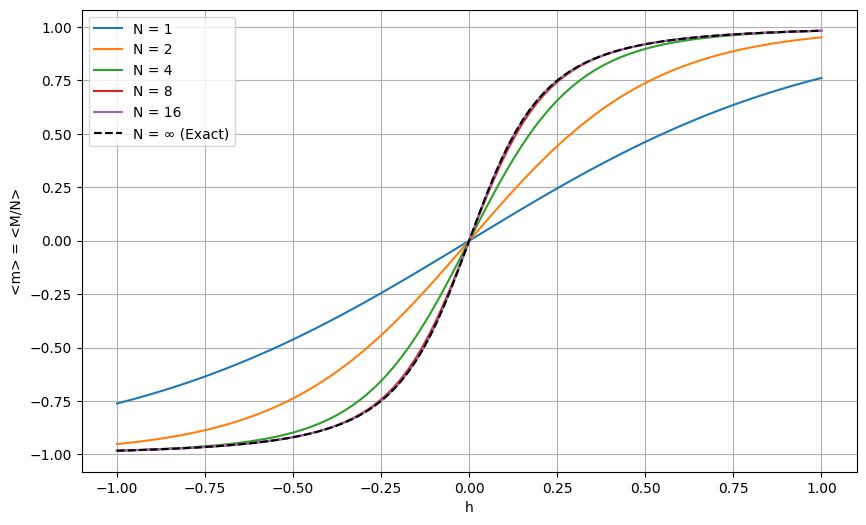

In [1]:
import numpy as np
import matplotlib.pyplot as plt

J = 0.75
beta = 1
K = beta * J
h_values = np.linspace(-1, 1, 100)
N_values = [1, 2, 4, 8, 16]

def magnetization_per_site(K, eta, N):
    lambda_plus = np.exp(K) * (np.cosh(eta) + np.sqrt(np.sinh(eta)**2 + np.exp(-4 * K)))
    lambda_minus = np.exp(K) * (np.cosh(eta) - np.sqrt(np.sinh(eta)**2 + np.exp(-4 * K)))
    Z = lambda_plus**N + lambda_minus**N
    dZ_deta = N * (lambda_plus**(N - 1) * np.exp(K) * (np.sinh(eta) + np.sinh(eta) * np.cosh(eta) / np.sqrt(np.sinh(eta)**2 + np.exp(-4 * K))) +
                   lambda_minus**(N - 1) * np.exp(K) * (np.sinh(eta) - np.sinh(eta) * np.cosh(eta) / np.sqrt(np.sinh(eta)**2 + np.exp(-4 * K))))
    M = dZ_deta / Z
    return M / N

def exact_m_infinity(K, eta):
    return np.sinh(eta) / np.sqrt(np.sinh(eta)**2 + np.exp(-4 * K))

plt.figure(figsize=(10, 6))
for N in N_values:
    m_values = [magnetization_per_site(K, h, N) for h in h_values]
    plt.plot(h_values, m_values, label=f'N = {N}')

m_exact = [exact_m_infinity(K, h) for h in h_values]
plt.plot(h_values, m_exact, 'k--', label='N = ∞ (Exact)')

plt.xlabel('h')
plt.ylabel('<m> = <M/N>')

plt.legend()
plt.grid(True)
plt.show()


In [2]:
def compute_action(sigma, K, eta):
    N = len(sigma)
    interaction_term = -K * sum(sigma[i] * sigma[(i + 1) % N] for i in range(N))
    magnetic_term = -eta * sum(sigma)
    S = interaction_term + magnetic_term
    return S

In [3]:
def delta_S(sigma, x, K, eta):
    N = len(sigma)
    left_neighbor = sigma[(x - 1) % N]
    right_neighbor = sigma[(x + 1) % N]
    delta_S_interaction = 2 * K * sigma[x] * (left_neighbor + right_neighbor)
    delta_S_magnetic = 2 * eta * sigma[x]
    return delta_S_interaction + delta_S_magnetic

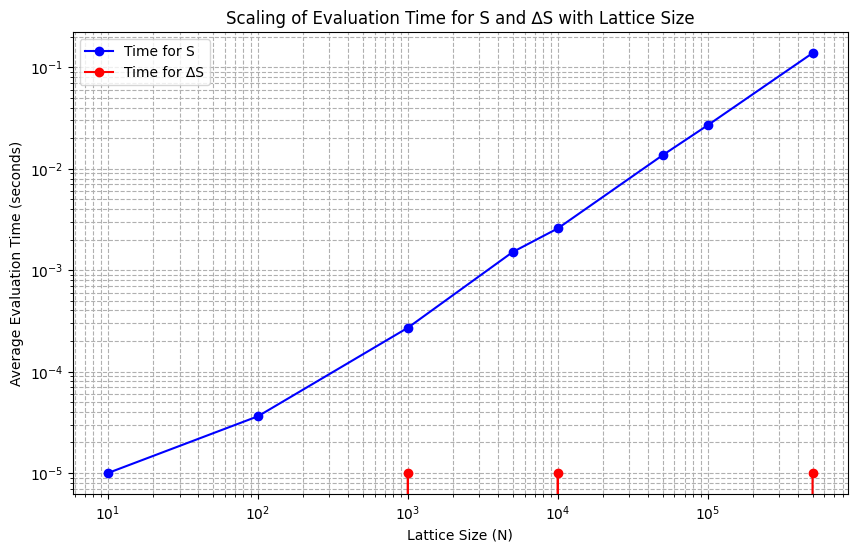

In [8]:
import time
K = 0.75
eta = 0.5
lattice_sizes = [10, 100, 1000,5000, 10000, 50000, 100000, 500000]  
n_trials = 100  


times_S = []
times_delta_S = []


for N in lattice_sizes:
    sigma = np.random.choice([-1, 1], size=N)  
    x = np.random.randint(0, N)  

    
    start_time = time.time()
    for _ in range(n_trials):
        compute_action(sigma, K, eta)
    avg_time_S = (time.time() - start_time) / n_trials
    times_S.append(avg_time_S)

    
    start_time = time.time()
    for _ in range(n_trials):
        delta_S(sigma, x, K, eta)
    avg_time_delta_S = (time.time() - start_time) / n_trials
    times_delta_S.append(avg_time_delta_S)


plt.figure(figsize=(10, 6))
plt.plot(lattice_sizes, times_S, label='Time for S', marker='o', color='b')
plt.plot(lattice_sizes, times_delta_S, label='Time for ∆S', marker='o', color='r')
plt.xscale('log')
plt.yscale('log')
plt.xlabel('Lattice Size (N)')
plt.ylabel('Average Evaluation Time (seconds)')
plt.title('Scaling of Evaluation Time for S and ∆S with Lattice Size')
plt.legend()
plt.grid(True, which="both", ls="--")
plt.show()

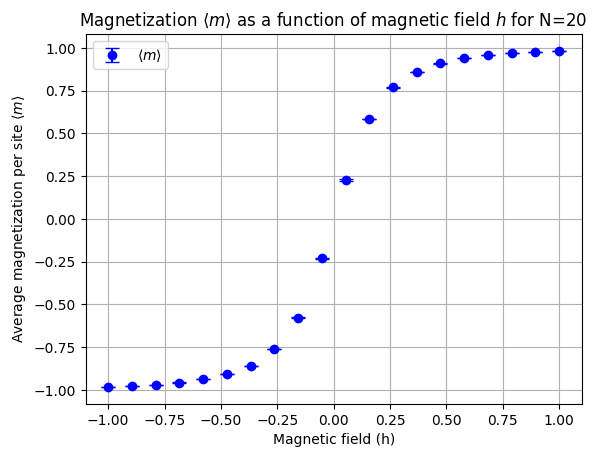

In [9]:



N = 20  
J = 0.75
beta = 1
K = beta * J
h_values = np.linspace(-1, 1, 20)  
num_samples = 10000  
num_repeats = 5  


def compute_action(sigma, K, eta):
    interaction_term = -K * sum(sigma[i] * sigma[(i + 1) % N] for i in range(N))
    magnetic_term = -eta * sum(sigma)
    return interaction_term + magnetic_term

def delta_S(sigma, x, K, eta):
    left_neighbor = sigma[(x - 1) % N]
    right_neighbor = sigma[(x + 1) % N]
    delta_S_interaction = 2 * K * sigma[x] * (left_neighbor + right_neighbor)
    delta_S_magnetic = 2 * eta * sigma[x]
    return delta_S_interaction + delta_S_magnetic

def single_site_update(sigma, K, eta):
    for x in np.random.permutation(N):
        delta_s = delta_S(sigma, x, K, eta)
        if np.random.rand() < min(1, np.exp(-delta_s)):
            sigma[x] *= -1  


results = []
errors = []

for h in h_values:
    eta = beta * h  
    magnetizations = []
    
    for _ in range(num_repeats):
       
        sigma = np.ones(N, dtype=int)
        
        
        m_values = []
        for _ in range(num_samples):
            single_site_update(sigma, K, eta)
            m_values.append(np.mean(sigma)) 
        
        
        magnetizations.append(np.mean(m_values))
    
    
    mean_m = np.mean(magnetizations)
    std_m = np.std(magnetizations) / np.sqrt(num_repeats)
    results.append(mean_m)
    errors.append(std_m)


plt.errorbar(h_values, results, yerr=errors, fmt='o', capsize=5, color='b', label=r'$\langle m \rangle$')
plt.xlabel('Magnetic field (h)')
plt.ylabel(r'Average magnetization per site $\langle m \rangle$')
plt.title(r'Magnetization $\langle m \rangle$ as a function of magnetic field $h$ for N=20')
plt.grid(True)
plt.legend()
plt.show()
